In [250]:
import sounddevice as sd
import numpy as np

def generate_pink_noise(sample_rate, duration):
    white_noise = np.random.normal(0,1,sample_rate * duration)

    spectrum = np.fft.rfft(white_noise)
    pink_spectrum = spectrum / np.sqrt(sample_rate)  

    return pink_spectrum.real

# Пример использования
sample_rate = 4100  # Частота дискретизации
duration = 5  # Длительность сигнала в секундах
pink_noise = generate_pink_noise(sample_rate, duration)
print(pink_noise)

[ 0.77245934 -3.0464983   2.18242997 ... -0.34029897 -1.11144001
  2.62555433]


In [251]:
sd.play(pink_noise, sample_rate)

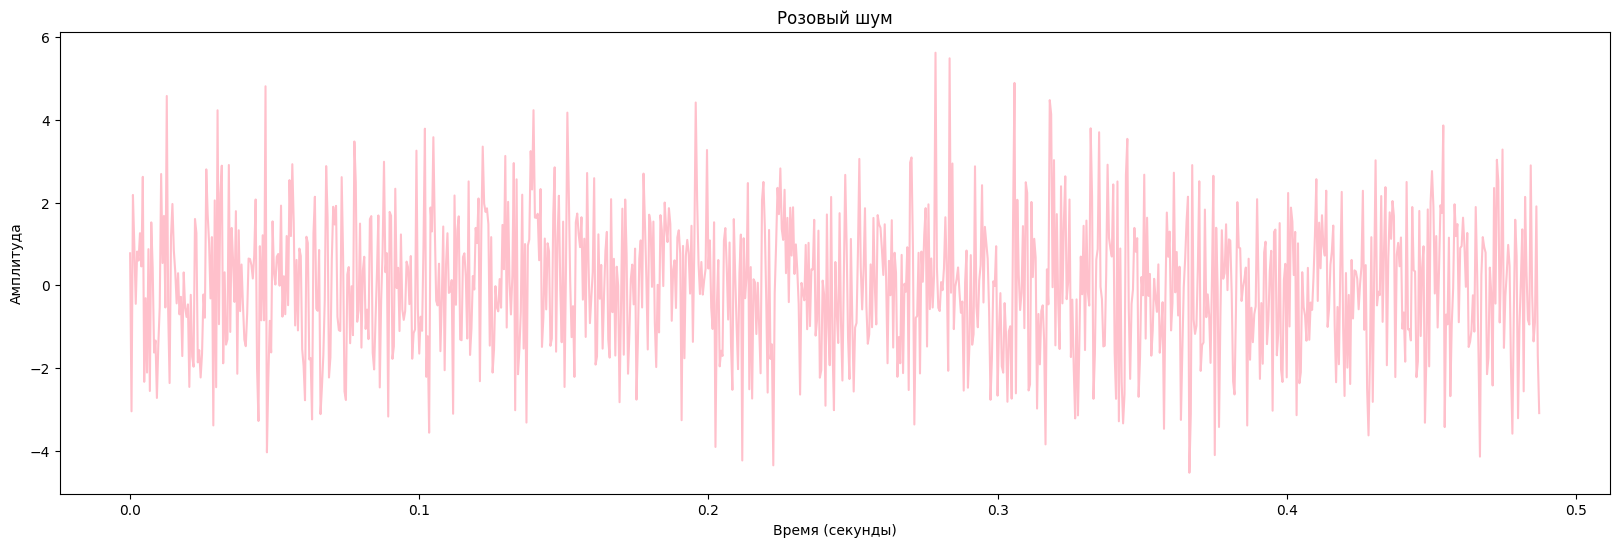

In [252]:
time_axis = np.linspace(0, duration, len(pink_noise)) 

plt.figure(figsize=(20, 6))  

plt.plot(time_axis[:1000], pink_noise[:1000], color='pink')

plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()


In [253]:
import scipy

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

print(kb)
print(h)
print(c)

T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

# количество элементов в записи сигнала. Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
num_samples = int(duration * freq1)


# Частоты, на которых будем генерировать

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось

black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]

1.380649e-23
6.62607015e-34
299792458.0


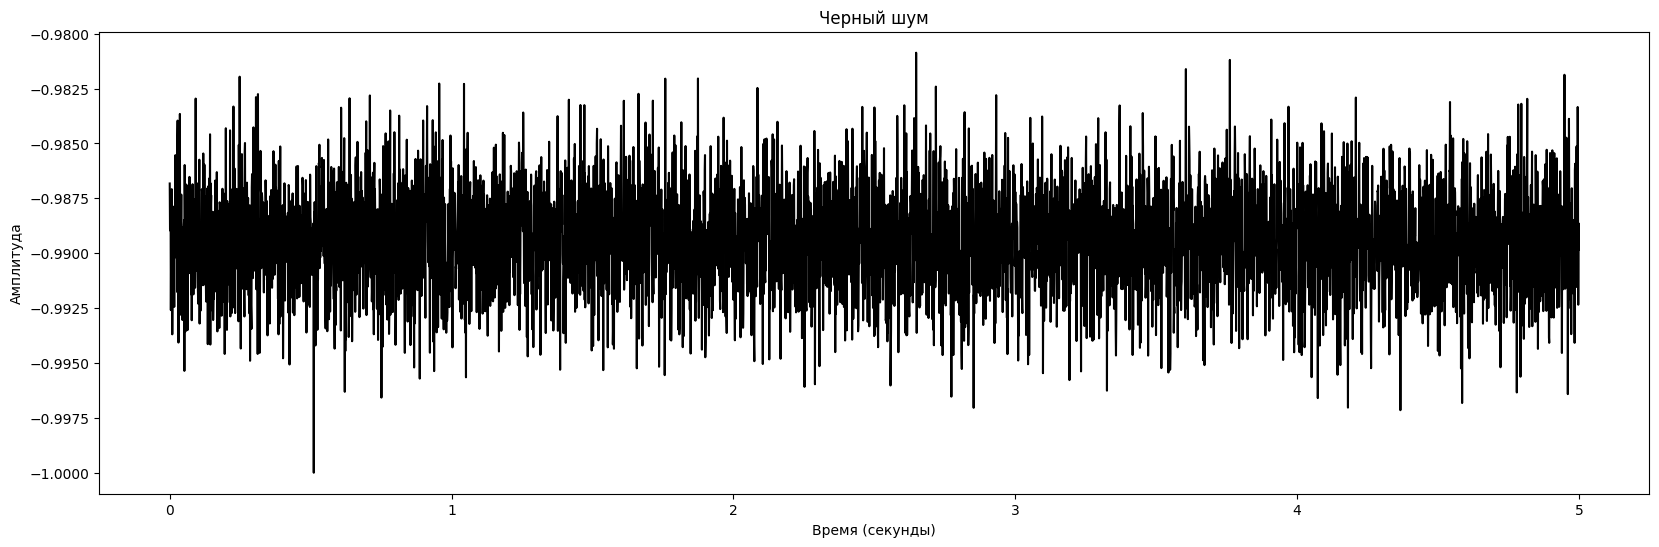

In [127]:
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise, color='black')
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

In [240]:
sd.play(black_noise, freq1)
sd.wait()

In [245]:
num_points = int((duration*sample_rate)//2+1)  # количество точек

time_points = np.linspace(0, duration, num_points)  # Создаем равномерные временные точки от 0 до 5 секунд

values = 150*np.tanh(time_points) # вычисляем амплитуды сигнала по синусоидальному закону

values_noise = values +pink_noise # зашумляем сигнал


C:\Users\pdd\AppData\Local\Temp\ipykernel_8196\2152536116.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


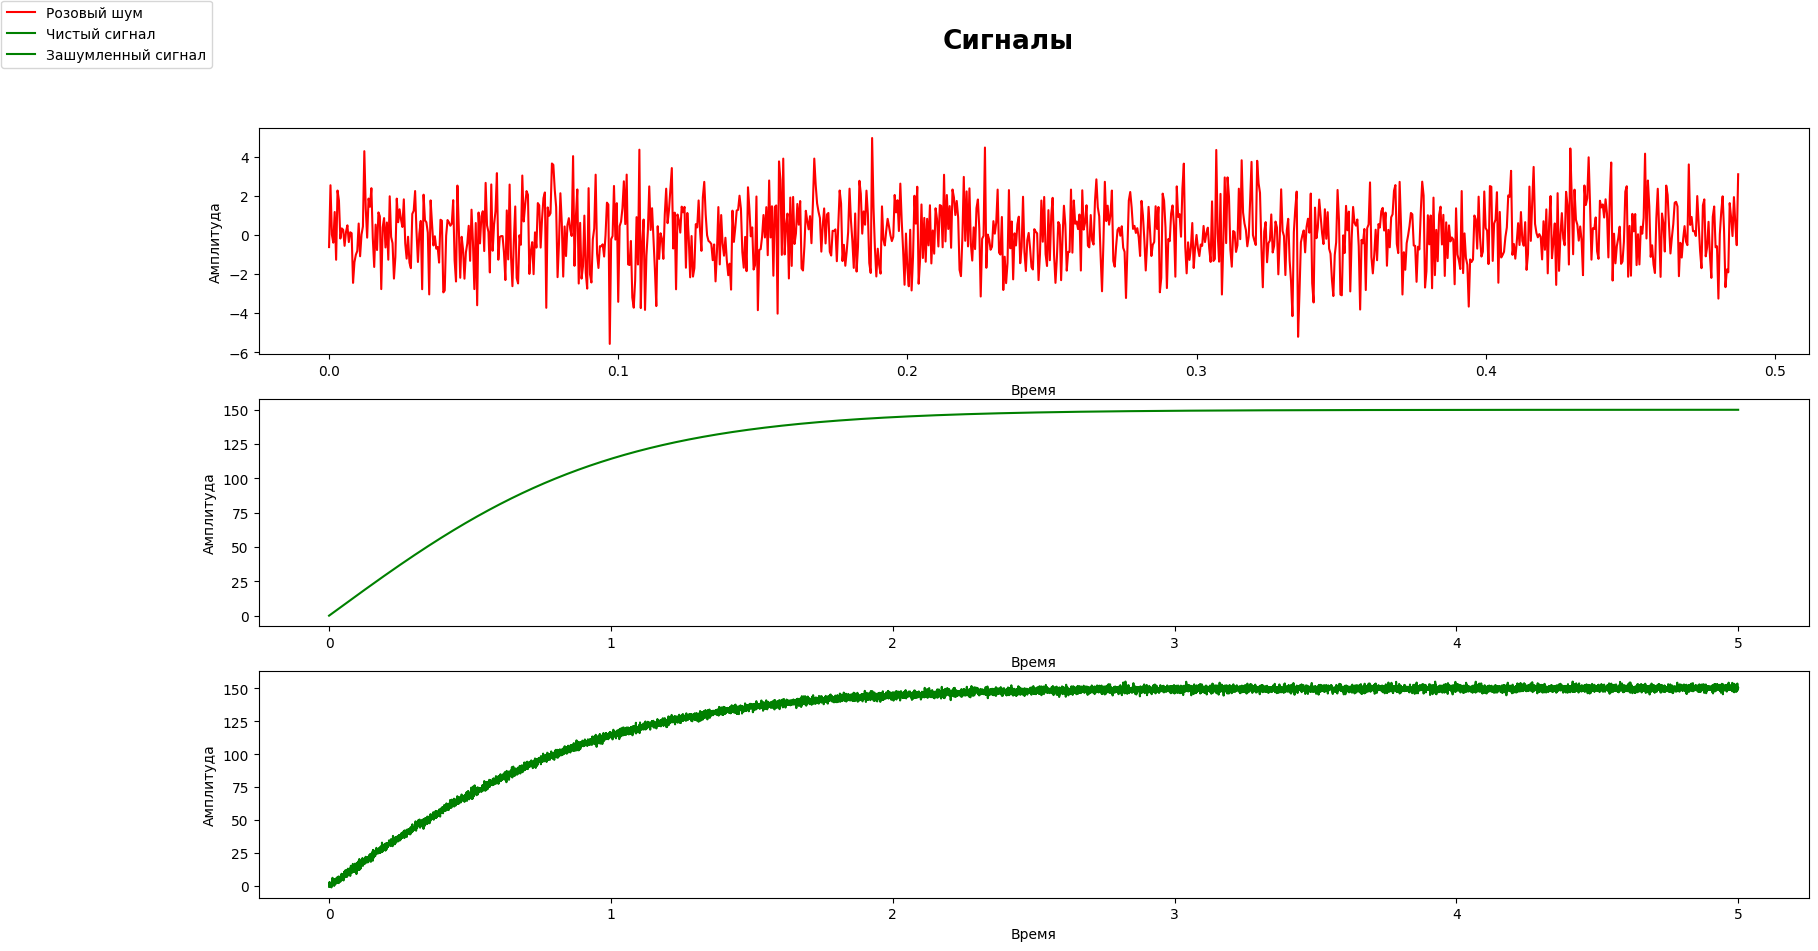

In [248]:
# Отрисовываем
# хотим нарисовать все на одном рисунке. Нам нужно 3 рисунка, один под другим.
fig, axs = plt.subplots(3, 1, figsize=(20, 10))


# общий заголовок для всей картинки
fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["Розовый шум", "Чистый сигнал", "Зашумленный сигнал"]

# определяем, что будем отрисовывать на 1 графике. По x - время, по y - амплитуды
c0 = axs[0].plot(time_points[:1000], pink_noise[:1000], color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c2 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

# отрисовываем общую легенду
fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)



In [247]:
sd.play(values_noise, sample_rate)